# Porto Seguro Safe Driver — Data Exploration for Risk Prediction

## 1. Business Framing

Porto Seguro wants to predict the probability that a client will file an auto insurance claim in the next year. 
Claims represent direct financial cost to the insurer and are a key driver of pricing, underwriting, and risk management decisions.

This dataset represents a privacy-preserving version of underwriting data, where feature meanings are anonymized but grouped by type 
(e.g., individual, vehicle, regional, and calculated features). The goal of this analysis is to assess data quality, signal strength, 
and feasibility of building an ML-based risk scoring system.


## 2. Data Understanding & EDA Summary

### 2.1 Import data, inspect columns & basic structure

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sample_submission.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample_sub.shape)


Train shape: (595212, 59)
Test shape: (892816, 58)
Sample submission shape: (892816, 2)


In [34]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [35]:
test.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

"Target" column is only in the train set. Except for that, they have the same columns.

In [36]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [37]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## Dataset Structure Summary

- Each row represents one insurance policyholder.
- The training set includes the target variable indicating whether a claim occurred.
- The test set contains the same features but without the target.
- Feature names are anonymized but grouped by prefixes:
  - `ind`: individual-related
  - `reg`: regional-related
  - `car`: vehicle-related
  - `calc`: derived or engineered features

- All data looks standartized, with data variance maximum 0-23, so all our columns are on the same scale.
- Feature columns are given in 3 types of values:
  - binary values
  - categorical values
  - numerical values


### 2.2 Feature Type Breakdown

Shows how much of the model depends on:
- binary signals
- categorical segmentation
- numeric risk scores

Supports product questions about what kinds of data drive risk.

In [39]:
target = train["target"]
features = train.drop(columns=["target"])
features.shape


(595212, 58)

In [40]:
bin_features = [c for c in features.columns if c.endswith("_bin")]
len(bin_features)

cat_features = [c for c in features.columns if c.endswith("_cat")]
len(cat_features)

num_features = [c for c in features.columns 
                if not c.endswith("_bin") and not c.endswith("_cat") and c != "id"]
len(num_features)

pd.DataFrame({
    "Feature Type": ["Binary", "Categorical", "Numeric/Ordinal"],
    "Count": [len(bin_features), len(cat_features), len(num_features)]
})


,Feature Type,Count
0,Binary,17
1,Categorical,14
2,Numeric/Ordinal,26


*Exploring categorical values*

In [41]:
train[cat_features].describe().T


,count,mean,std,min,25%,50%,75%,max
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.0,1.0,1.0,2.0,4.0
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.0,0.0,0.0,1.0,1.0
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.0,0.0,0.0,0.0,6.0
ps_car_01_cat,595212.0,8.295933,2.508270,-1.0,7.0,7.0,11.0,11.0
ps_car_02_cat,595212.0,0.829931,0.375716,-1.0,1.0,1.0,1.0,1.0
ps_car_03_cat,595212.0,-0.504899,0.788654,-1.0,-1.0,-1.0,0.0,1.0
ps_car_04_cat,595212.0,0.725192,2.153463,0.0,0.0,0.0,0.0,9.0
ps_car_05_cat,595212.0,-0.157732,0.844417,-1.0,-1.0,0.0,1.0,1.0
ps_car_06_cat,595212.0,6.555340,5.501445,0.0,1.0,7.0,11.0,17.0
ps_car_07_cat,595212.0,0.910027,0.347106,-1.0,1.0,1.0,1.0,1.0


In [42]:
cat_summary = pd.DataFrame({
    "min": train[cat_features].min(),
    "max": train[cat_features].max(),
    "n_unique": train[cat_features].nunique(),
    "missing_rate": (train[cat_features] == -1).mean()
}).sort_values("n_unique", ascending=False)

cat_summary



,min,max,n_unique,missing_rate
ps_car_11_cat,1,104,104,0.000000
ps_car_06_cat,0,17,18,0.000000
ps_car_01_cat,-1,11,13,0.000180
ps_car_04_cat,0,9,10,0.000000
ps_ind_05_cat,-1,6,8,0.009760
ps_car_09_cat,-1,4,6,0.000956
ps_ind_02_cat,-1,4,5,0.000363
ps_ind_04_cat,-1,1,3,0.000139
ps_car_02_cat,-1,1,3,0.000008
ps_car_03_cat,-1,1,3,0.690898


In [43]:
train["ps_car_03_cat"].value_counts(dropna=False).sort_index()


ps_car_03_cat
-1    411231
 0     73272
 1    110709
Name: count, dtype: int64

In [44]:
train["ps_car_06_cat"].value_counts(dropna=False).sort_index()

ps_car_06_cat
0     110420
1     118386
2       1607
3      11997
4      31136
5       1401
6      20951
7      16158
8       1412
9      17617
10     33466
11    131527
12      2386
13      6246
14     59253
15     21732
16      4582
17      4935
Name: count, dtype: int64

In [45]:
train["ps_car_08_cat"].value_counts(dropna=False).sort_index()

ps_car_08_cat
0     99948
1    495264
Name: count, dtype: int64

This one looks binary!

In [46]:
def get_group(col):
    return col.split("_")[1]

group_counts = pd.Series([get_group(c) for c in features.columns if c != "id"]).value_counts()
group_counts


calc    20
ind     18
car     16
reg      3
Name: count, dtype: int64

The dataset relies heavily on engineered (calc) and individual-level (ind) features, with very few regional variables. This suggests decisions are driven more by personal and vehicle characteristics than by geography.

### 2.3 Missing Data

Note: missing values are encoded as -1, not NaN.

In [47]:
features_nan = features.replace(-1, pd.NA)

missing_rate = features_nan.isna().mean().sort_values(ascending=False)
missing_rate.head(10)



ps_car_03_cat    0.690898
ps_car_05_cat    0.447825
ps_reg_03        0.181065
ps_car_14        0.071605
ps_car_07_cat    0.019302
ps_ind_05_cat    0.009760
ps_car_09_cat    0.000956
ps_ind_02_cat    0.000363
ps_car_01_cat    0.000180
ps_ind_04_cat    0.000139
dtype: float64

ps_car_03_cat → 69% missing

ps_car_05_cat → 45% missing

ps_reg_03 → 18% missing

In [48]:
(missing_rate > 0).sum() # how many features have missing values?


np.int64(13)

Does Missing Data Correlate with Risk?

In [49]:
has_missing = features_nan.isna().any(axis=1)
pd.DataFrame({
    "has_missing": has_missing,
    "target": target
}).groupby("has_missing")["target"].mean()


has_missing
False    0.045385
True     0.034073
Name: target, dtype: float64

No missing data → claim rate = 4.54%
Missing data  → claim rate = 3.41%

Drivers with missing data actually have LOWER claim probability than drivers with complete data.
This could mean:
- Certain low-risk customer segments provide less information
- Or high-risk drivers tend to have more complete records (e.g., prior history)

### 2.4 Target Distribution

In [ ]:
claim_rate = target.mean()
claim_rate


np.float64(0.036447517859182946)

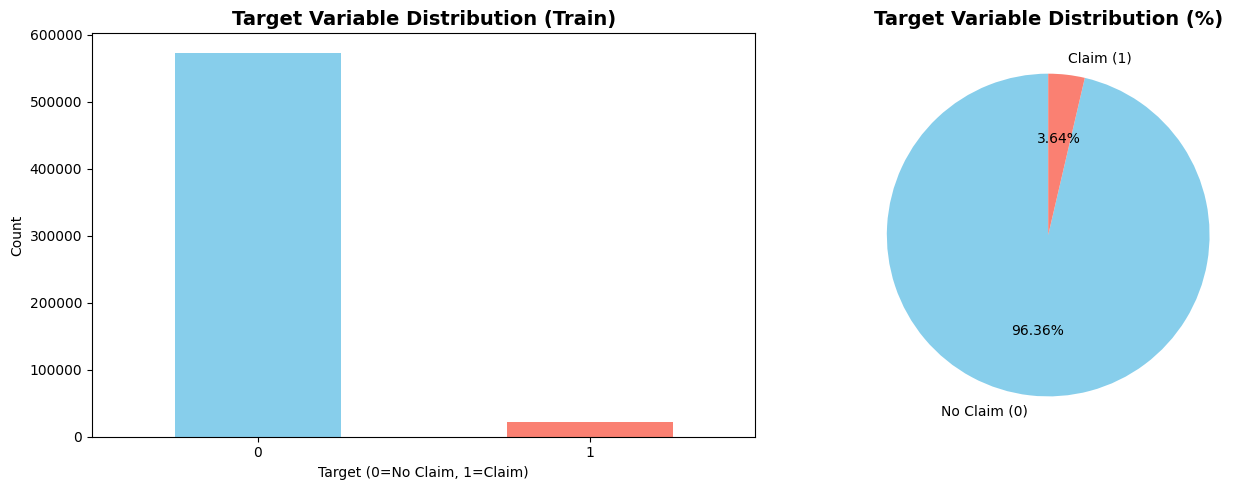


Target variable statistics:
target
0    573518
1     21694
Name: count, dtype: int64

Percentages:
target
0    96.355248
1     3.644752
Name: proportion, dtype: float64


In [55]:
# Analyze target variable in train dataset
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Value counts
train['target'].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Target Variable Distribution (Train)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Target (0=No Claim, 1=Claim)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['0', '1'], rotation=0)

# Percentage
target_pct = train['target'].value_counts(normalize=True) * 100
axes[1].pie(target_pct, labels=['No Claim (0)', 'Claim (1)'], autopct='%1.2f%%', 
            colors=['skyblue', 'salmon'], startangle=90)
axes[1].set_title('Target Variable Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTarget variable statistics:")
print(train['target'].value_counts())
print(f"\nPercentages:")
print(train['target'].value_counts(normalize=True) * 100)

### Target Imbalance and Business Implications

- Only 3,6% of clients file claims, indicating a highly imbalanced dataset.
- This reflects real insurance dynamics, where most customers are profitable and only a few generate large costs.

Implications:
- Accuracy is not a useful metric (predicting 'no claim' always would appear highly accurate).
- Risk scoring and ranking are more relevant than hard classification.
- Business decisions must balance preventing costly claims vs rejecting profitable customers.

- False negatives (miss a risky driver) → high claim cost
- False positives (flag low-risk driver) → lose revenue or frustrate customer


### 2.5 Correlation plots

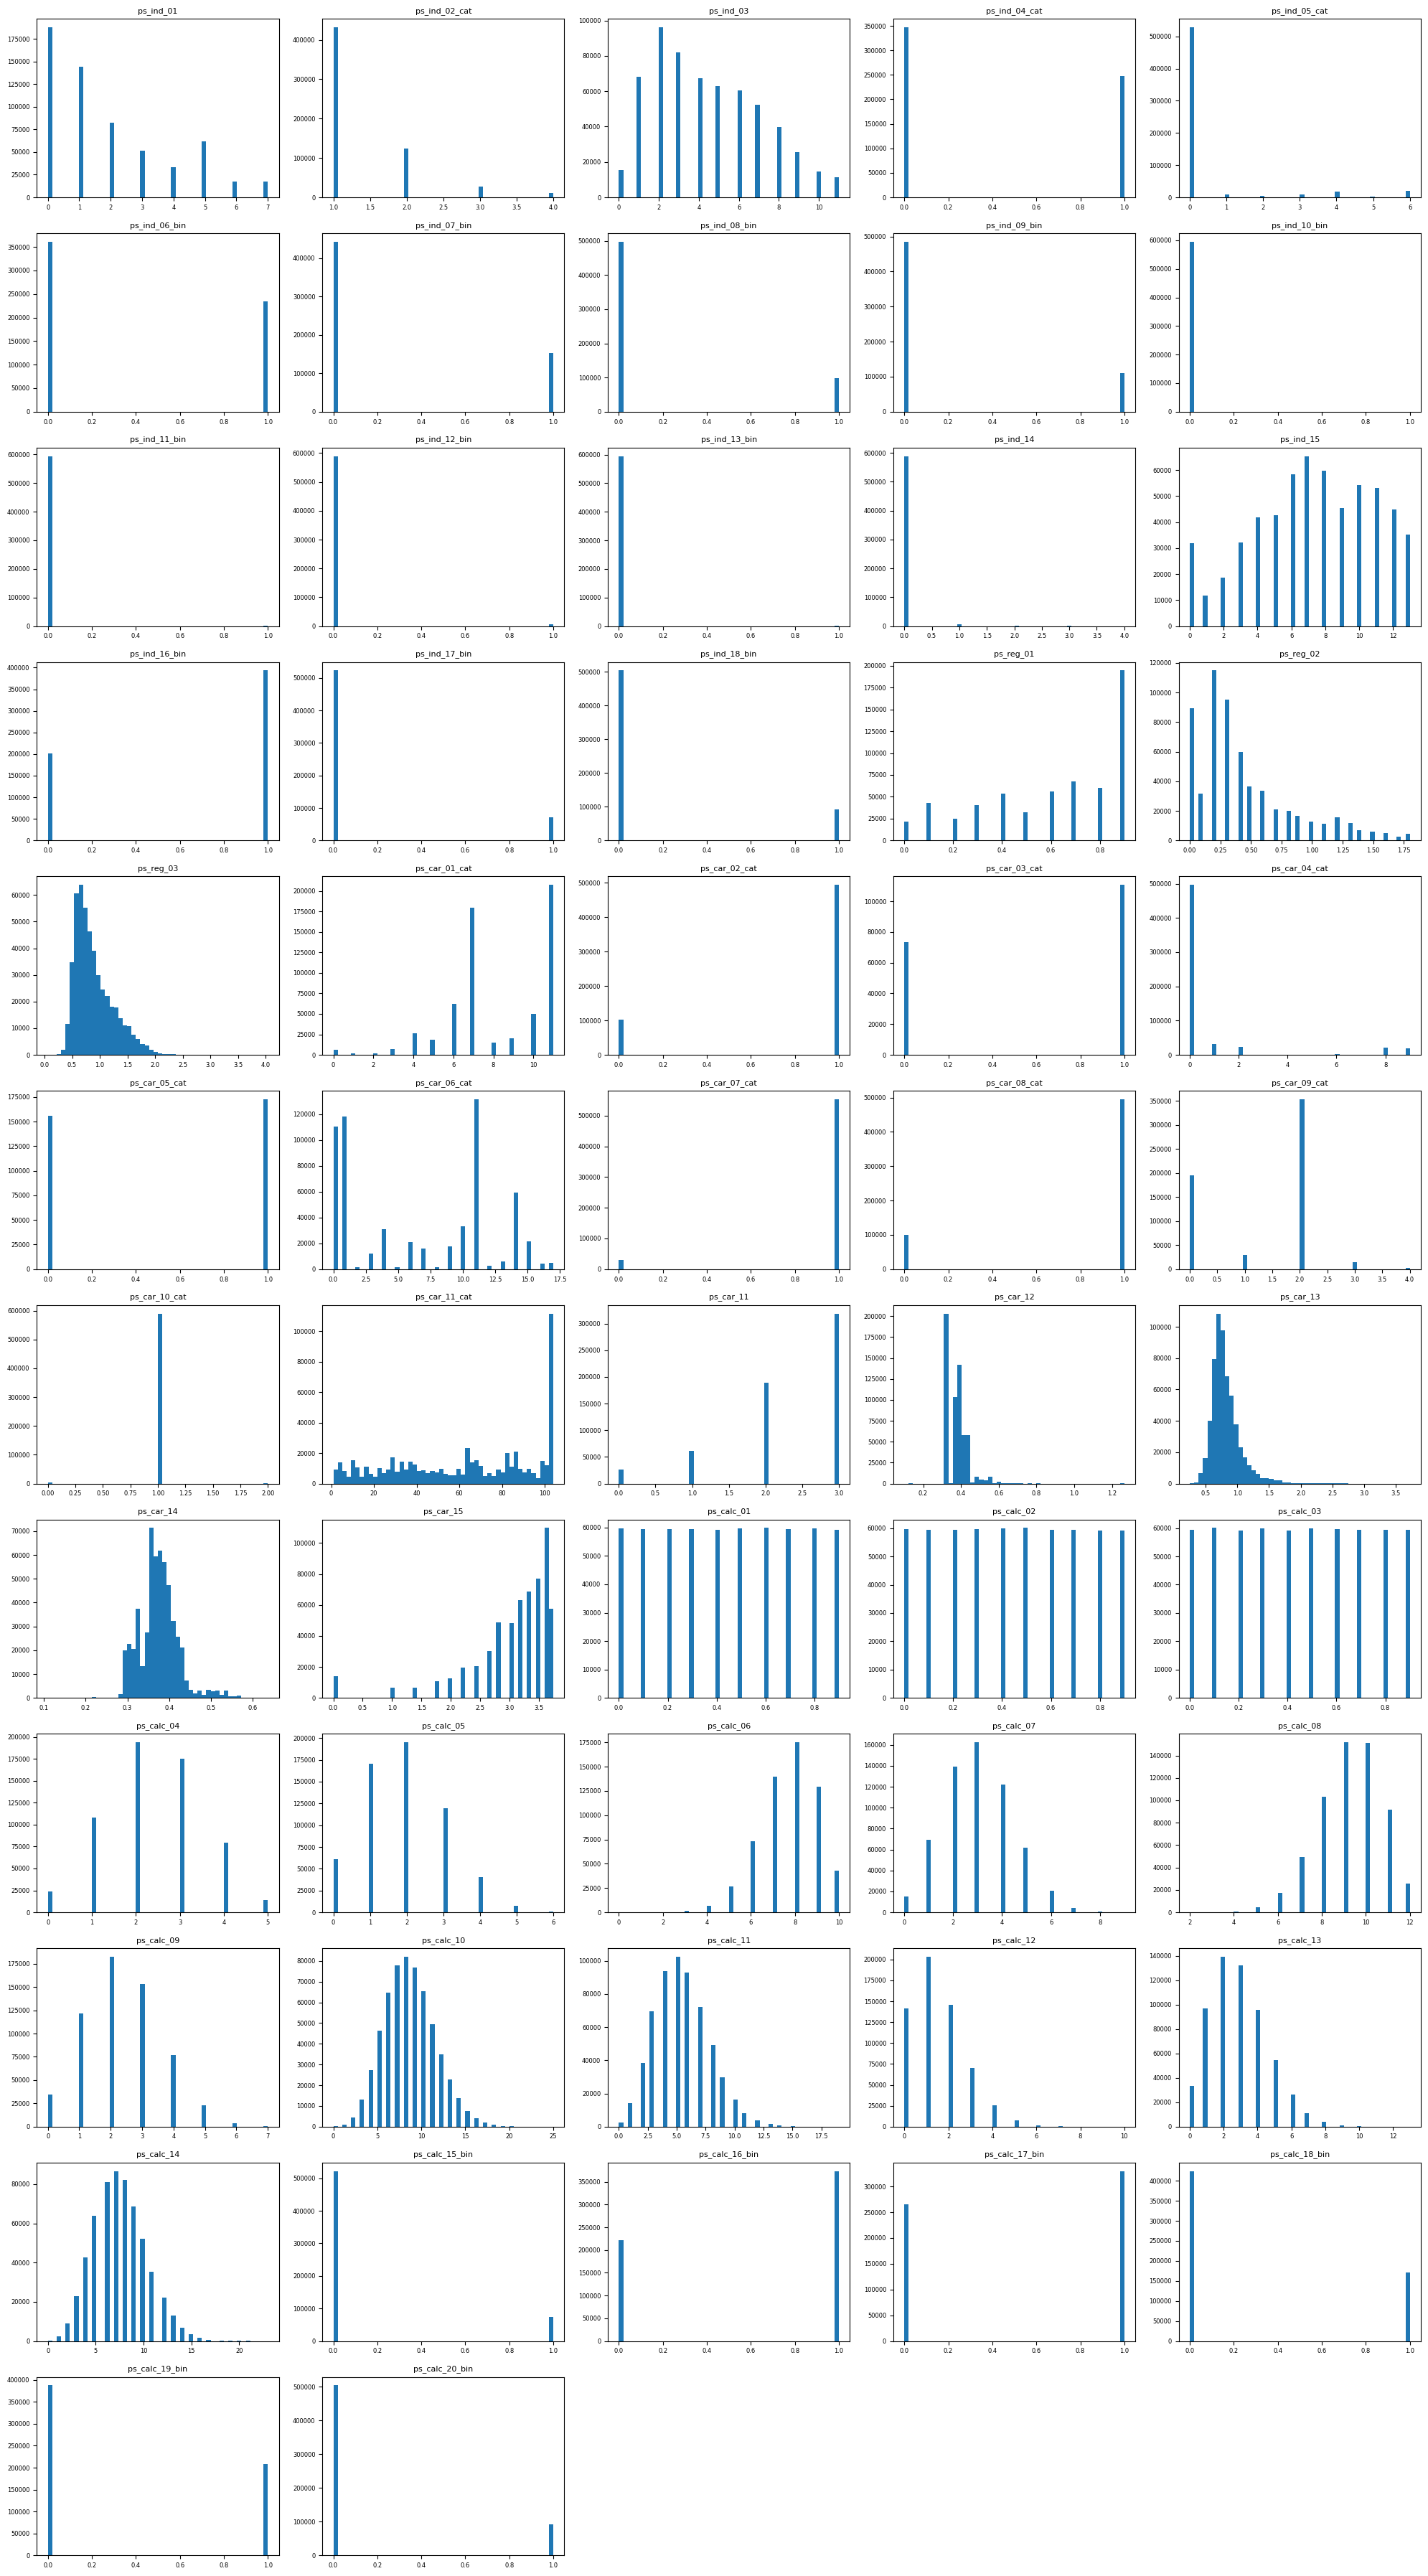

In [60]:
# Let's plot histograms for all features to understand their distributions.

# Columns to plot (optionally exclude id/target)
cols = [c for c in train.columns if c not in ("id", "target")]

import math

n_cols = 5  # number of plots per row
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    data = train[train[col] != -1][col]
    ax.hist(data, bins=50)
    ax.set_title(col, fontsize=8)
    ax.tick_params(axis='both', labelsize=6)

# Remove empty subplots
for ax in axes[len(cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

# From the histograms, we can see that a few features are skewed or have outliers. Some features are categorical, while others are continuous.
# We might want to put on log scale for skewed features: ps_reg_03, ps_car_12, ps_car_13.

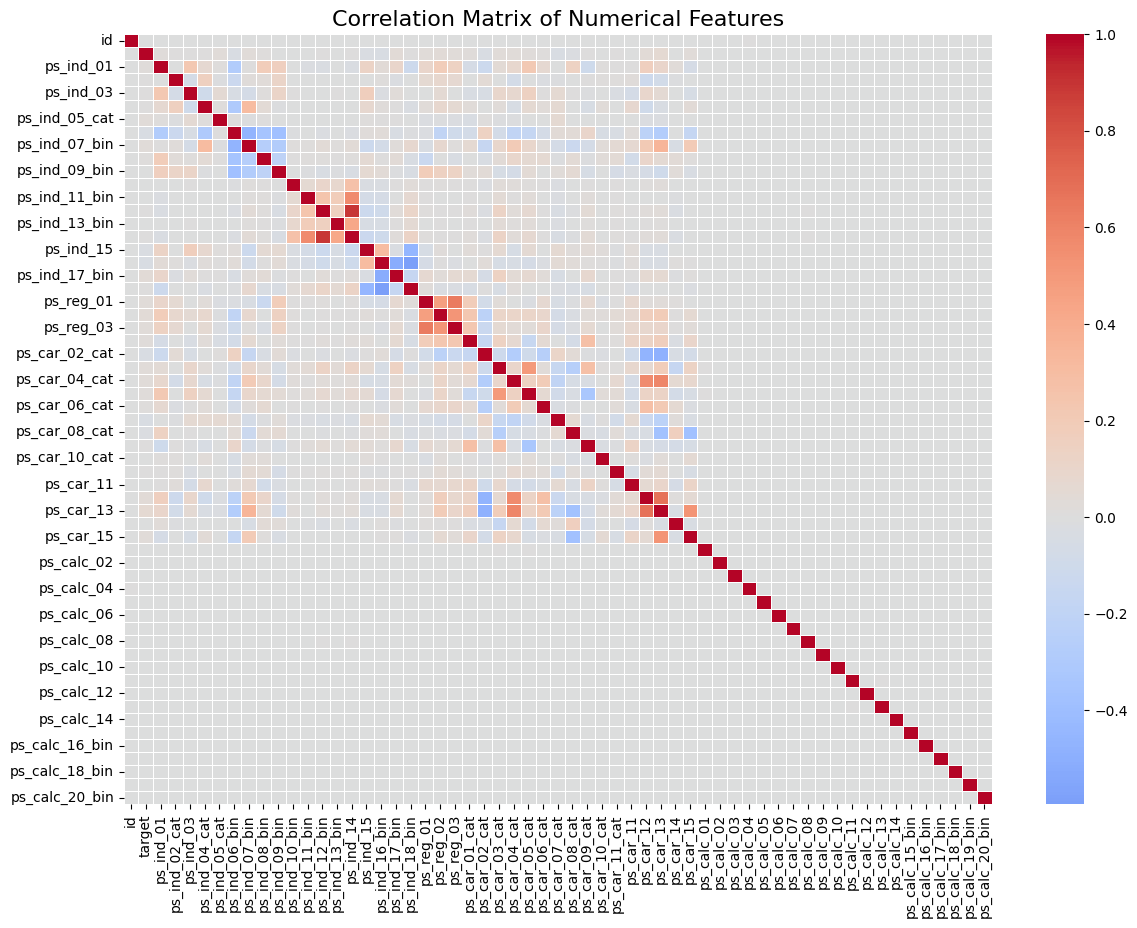

In [53]:
# Compute and visualize the correlation matrix for numerical features
corr = train.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

Top 10 features most correlated with claims (target):


ps_car_13        0.053899
ps_car_12        0.038790
ps_ind_17_bin    0.037053
ps_car_07_cat   -0.036395
ps_reg_02        0.034800
ps_ind_07_bin    0.034218
ps_ind_06_bin   -0.034017
ps_car_04_cat    0.032900
ps_car_03_cat    0.032401
ps_car_02_cat   -0.031534
Name: target, dtype: float64

/var/folders/0w/5vpv9jhj1glbx7b61hfvsxjm0000gn/T/ipykernel_26060/588970842.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.head(10).values, y=corr_with_target.head(10).index, palette='viridis')


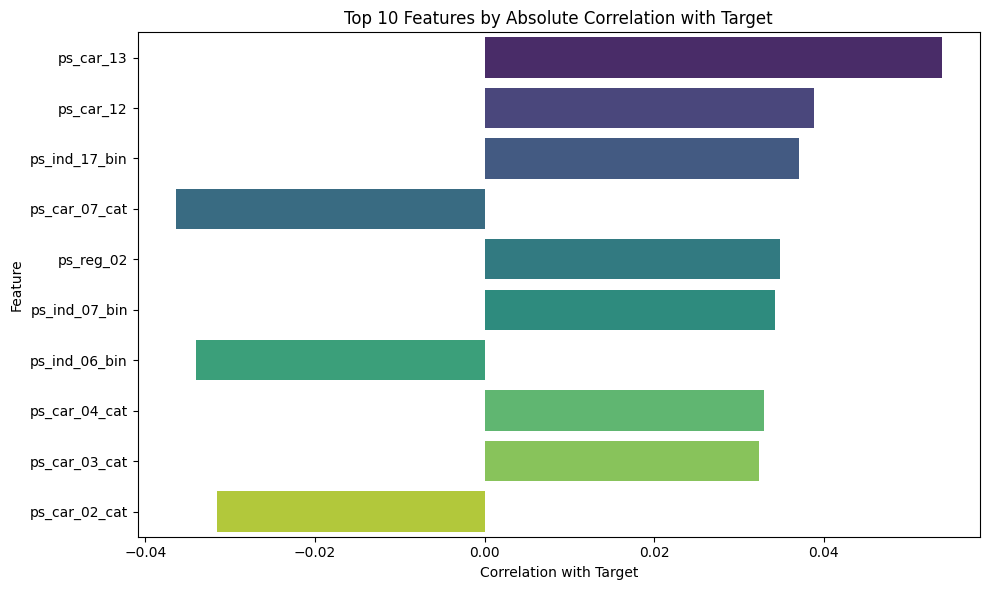

In [59]:
# Calculate correlation of each feature with the target variable
corr_with_target = train.corr()['target'].drop(['id', 'target']).sort_values(key=abs, ascending=False)

# Display top 10 features most correlated with the target
print('Top 10 features most correlated with claims (target):')
display(corr_with_target.head(10))

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.head(10).values, y=corr_with_target.head(10).index, palette='viridis')
plt.title('Top 10 Features by Absolute Correlation with Target')
plt.xlabel('Correlation with Target')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**Explanation:**

The bar chart above shows the top 10 features with the highest absolute correlation to the target variable (`claims`).

- **How it works:** Correlation measures the strength and direction of a linear relationship between each feature and the target. Features with higher absolute correlation values (closer to 1 or -1) are more strongly associated with the likelihood of a claim.
- **Interpretation:** The features at the top of the chart are those whose values change most consistently with the target (claims). A positive correlation means higher feature values are associated with more claims, while a negative correlation means higher feature values are associated with fewer claims.
- **Why these features:** We calculated the correlation for every numerical feature in the dataset and sorted them by the absolute value of their correlation with the target. The top 10 are shown in the graph. These features are likely to be more useful for predicting claims, especially in linear models.

**Note:** Correlation only captures linear relationships and does not account for interactions or non-linear effects. For more robust feature importance, consider using tree-based models or permutation importance.